# Import Libraries


In [2]:
# import libraries
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import string

# Loading the clean dataset


In [3]:
# read the clean data csv file
movies = pd.read_csv(r"/content/clean_movies.csv")


In [5]:
# display the clean movie dataset
movies

,Rank,Name,Year,Rating,Genres,Certificate,Run_time,Tagline,Budget,Box_office,Casts,Directors,Writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,142,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,175,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,152,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,202,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,96,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,146,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,142,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,90,Wish granted! (DVD re-release),Unknown,Unknown,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,191,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


# Movie Analysis

In [210]:
# iterate through the genre column and get the number of movies for each genre
movie_genres = {}
for genres in movies.Genres:
  genre = genres.split(',')
  for type in genre:
    if (type in movie_genres) == False:
      movie_genres[type] = 1
    else:
      movie_genres[type] = movie_genres[type] + 1

# sort the movie_genres dict and display as a table
sorted_movies_genres = dict(sorted(movie_genres.items(), key=lambda x:x[1]))

# print the names of the columns.
print("{:<10} {:<10}".format('Genre', 'Count'))
 
# print each data item.
for key, value in sorted_movies_genres.items():
  print("{:<10} {:<10}".format(key, value))

Genre      Count     
Musical    1         
Music      4         
Film-Noir  4         
Horror     5         
Sport      5         
Western    7         
History    10        
Family     13        
Fantasy    14        
Sci-Fi     20        
Romance    23        
War        23        
Animation  23        
Biography  29        
Thriller   30        
Mystery    31        
Comedy     45        
Action     50        
Crime      51        
Adventure  60        
Drama      177       


In [211]:
# font 
font1 = {'family':'serif','color':'blue','size':30}
font2 = {'family':'serif','color':'darkred','size':20}

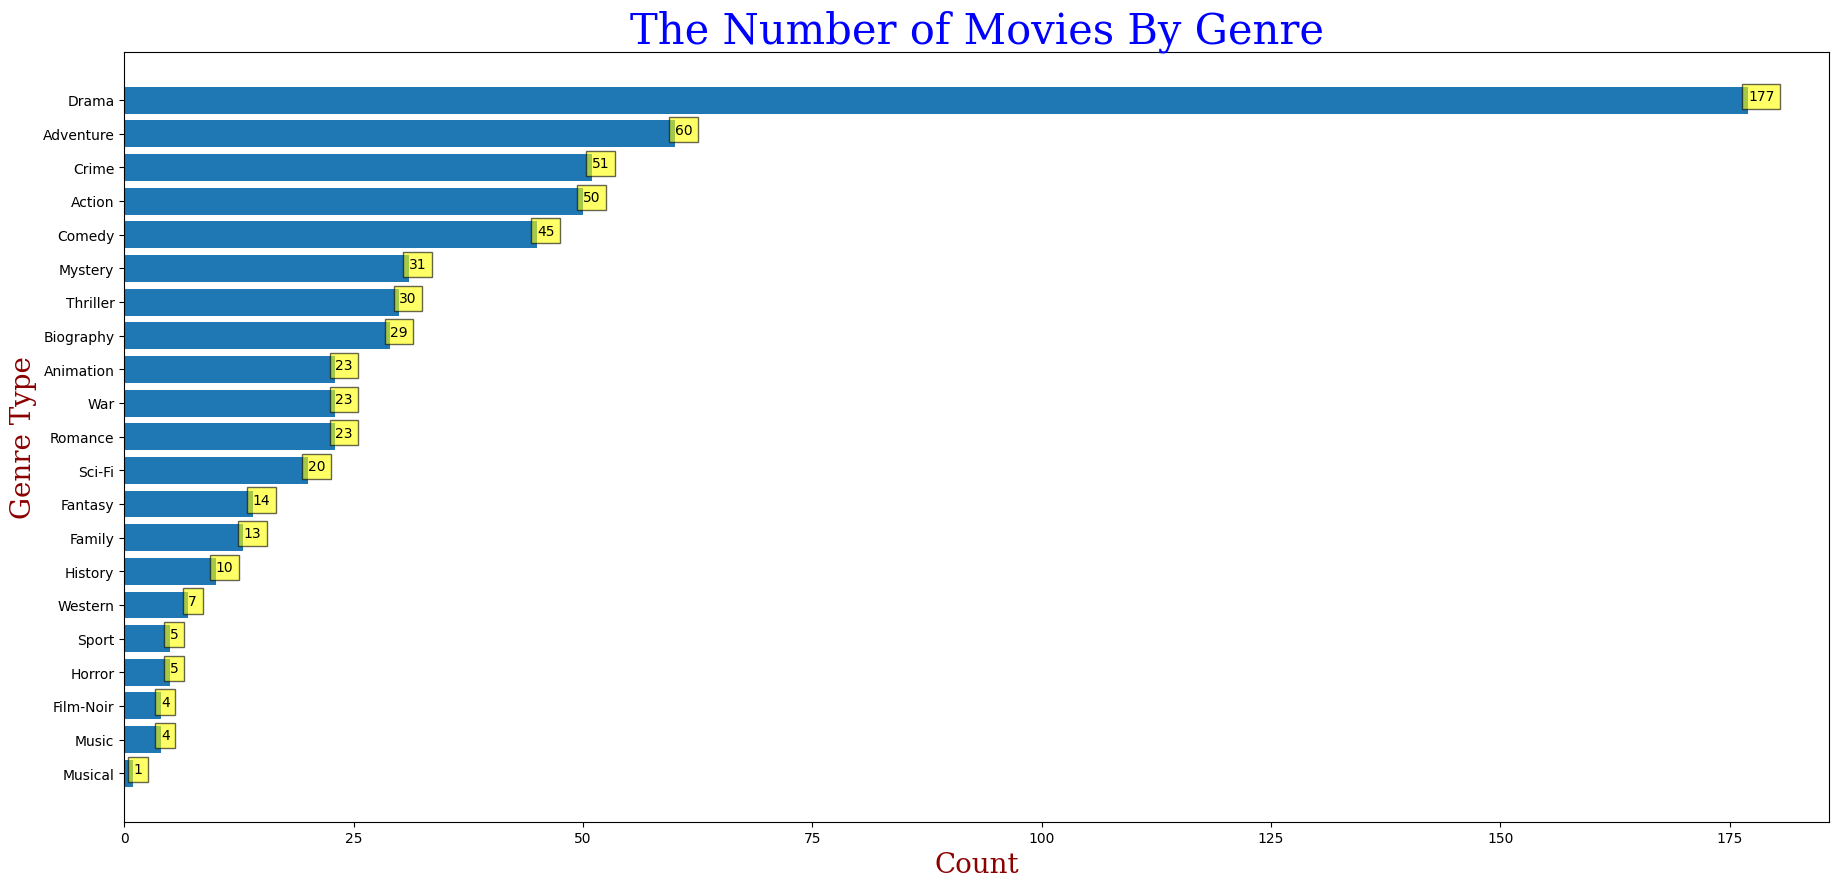

In [212]:
genre = list(sorted_movies_genres.keys())
count = list(sorted_movies_genres.values())
fig = plt.figure(figsize = (22, 10))
 
# creating the bar plot to display number of movies by genre
plt.barh(genre, count)

# adding label
for index, value in enumerate(count):
    plt.text(value, index, str(value), bbox=dict(facecolor='yellow', alpha=.6))
    
# display
plt.xlabel("Count", fontdict=font2)
plt.ylabel("Genre Type", fontdict=font2)
plt.title("The Number of Movies By Genre", fontdict=font1)
plt.show()

In [213]:
# divide the Genres column into 3 genre columns
movies[['Genre 1', 'Genre 2', 'Genre 3']] = movies.Genres.str.split(",", expand = True)
movies

,Rank,Name,Year,Rating,Genres,Certificate,Run_time,Tagline,Budget,Box_office,Casts,Directors,Writers,Genre 1,Genre 2,Genre 3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,142,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,175,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,152,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,202,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,96,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,146,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",Drama,None,None
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,142,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",Adventure,Biography,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,90,Wish granted! (DVD re-release),Unknown,Unknown,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",Animation,Adventure,Comedy
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,191,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,Biography,Drama,History


In [214]:
# group the table by Genre 1 column and count the average rating of movies by each genre
average_ratings = movies.groupby(['Genre 1'])['Rating'].mean().sort_values(ascending=True).to_dict()

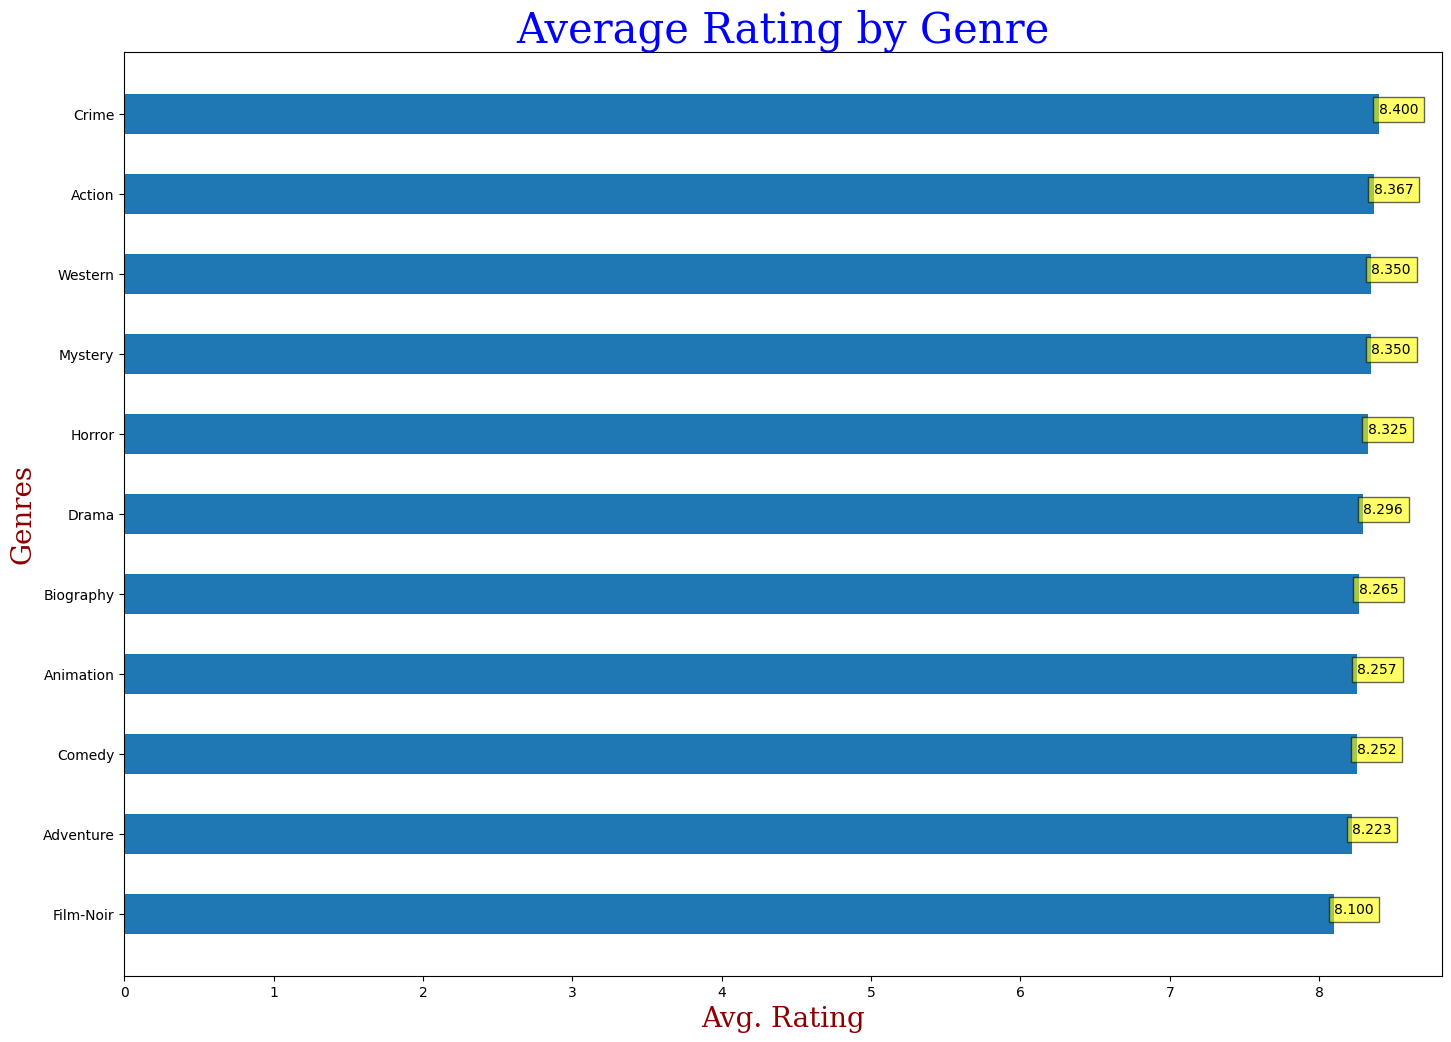

In [215]:
# creating the plot and figure size
category = list(average_ratings.keys())
rate = list(average_ratings.values())
fig = plt.figure(figsize = (17,12))

# creating the bar plot to  average rating of movies by each genre
plt.barh(category, rate, height=0.5)

# adding label
for index, value in enumerate(rate):
    plt.text(value, index, str("%.3f" % value), bbox=dict(facecolor='yellow', alpha=.6))

# display
plt.xlabel("Avg. Rating", fontdict=font2)
plt.ylabel("Genres", fontdict=font2)
plt.title("Average Rating by Genre", fontdict=font1)
plt.show()

In [216]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center', bbox = dict(facecolor = 'yellow', alpha = .7))

In [217]:
# display top 10 movies's rating
top_10 = movies.nlargest(n=10, columns=['Rating'])
top_10

,Rank,Name,Year,Rating,Genres,Certificate,Run_time,Tagline,Budget,Box_office,Casts,Directors,Writers,Genre 1,Genre 2,Genre 3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,142,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,175,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,152,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,202,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,96,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
5,6,Schindler's List,1993,9.0,"Biography,Drama,History",R,195,"Whoever saves one life, saves the world entire.",22000000,322161245,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",Steven Spielberg,"Thomas Keneally,Steven Zaillian",Biography,Drama,History
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,201,The eye of the enemy is moving.,94000000,1146457748,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",Action,Adventure,Drama
7,8,Pulp Fiction,1994,8.9,"Crime,Drama",R,154,Girls like me don't make invitations like this...,8000000,213928762,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",Quentin Tarantino,"Quentin Tarantino,Roger Avary",Crime,Drama,None
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,"Action,Adventure,Drama",PG-13,178,The Legend Comes to Life,93000000,898204420,"Elijah Wood,Ian McKellen,Orlando Bloom,Sean Be...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",Action,Adventure,Drama
9,10,"The Good, the Bad and the Ugly",1966,8.8,"Adventure,Western",Approved,178,They formed an alliance of hate to steal a for...,1200000,25253887,"Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo ...",Sergio Leone,"Luciano Vincenzoni,Sergio Leone,Agenore Incrocci",Adventure,Western,None


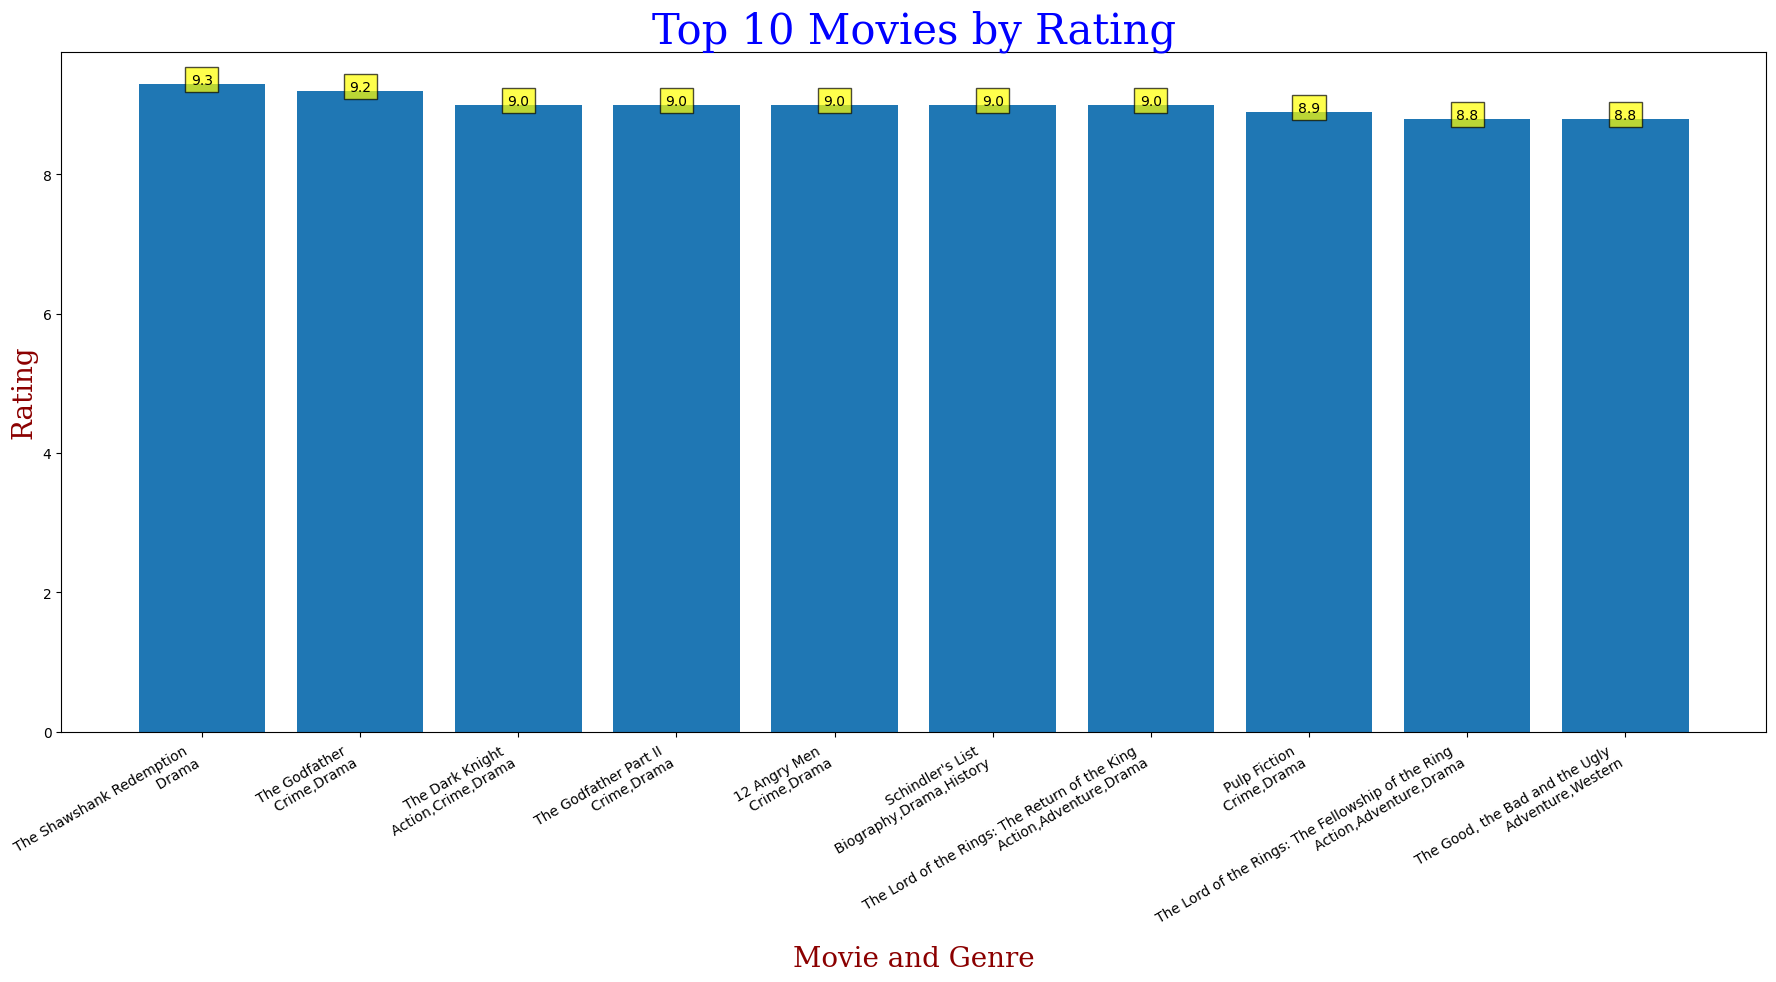

In [218]:
# creating the bar plot and figure size
fig, ax = plt.subplots(1, figsize = (22, 10))
fig.autofmt_xdate()
names = top_10['Name']
values = top_10['Rating']
genres = top_10['Genres']
name_and_genre = top_10['Name'] + ' \n ' + top_10['Genres']

# calling the function to add value labels
addlabels(name_and_genre, values)

# using bar graph to display top 10 movies by rating
plt.bar(name_and_genre,values)
plt.xlabel("Movie and Genre", fontdict=font2)
plt.ylabel("Rating", fontdict=font2)
plt.title("Top 10 Movies by Rating", fontdict=font1)
plt.show()

In [221]:
# Display the number of directors appear more than two in the list
movies_director = movies.groupby(['Directors']).size().reset_index(name='Count').sort_values(by='Count',ascending=True).reset_index(drop=True)
popular_directors = movies_director[movies_director['Count']>2].reset_index(drop=True)

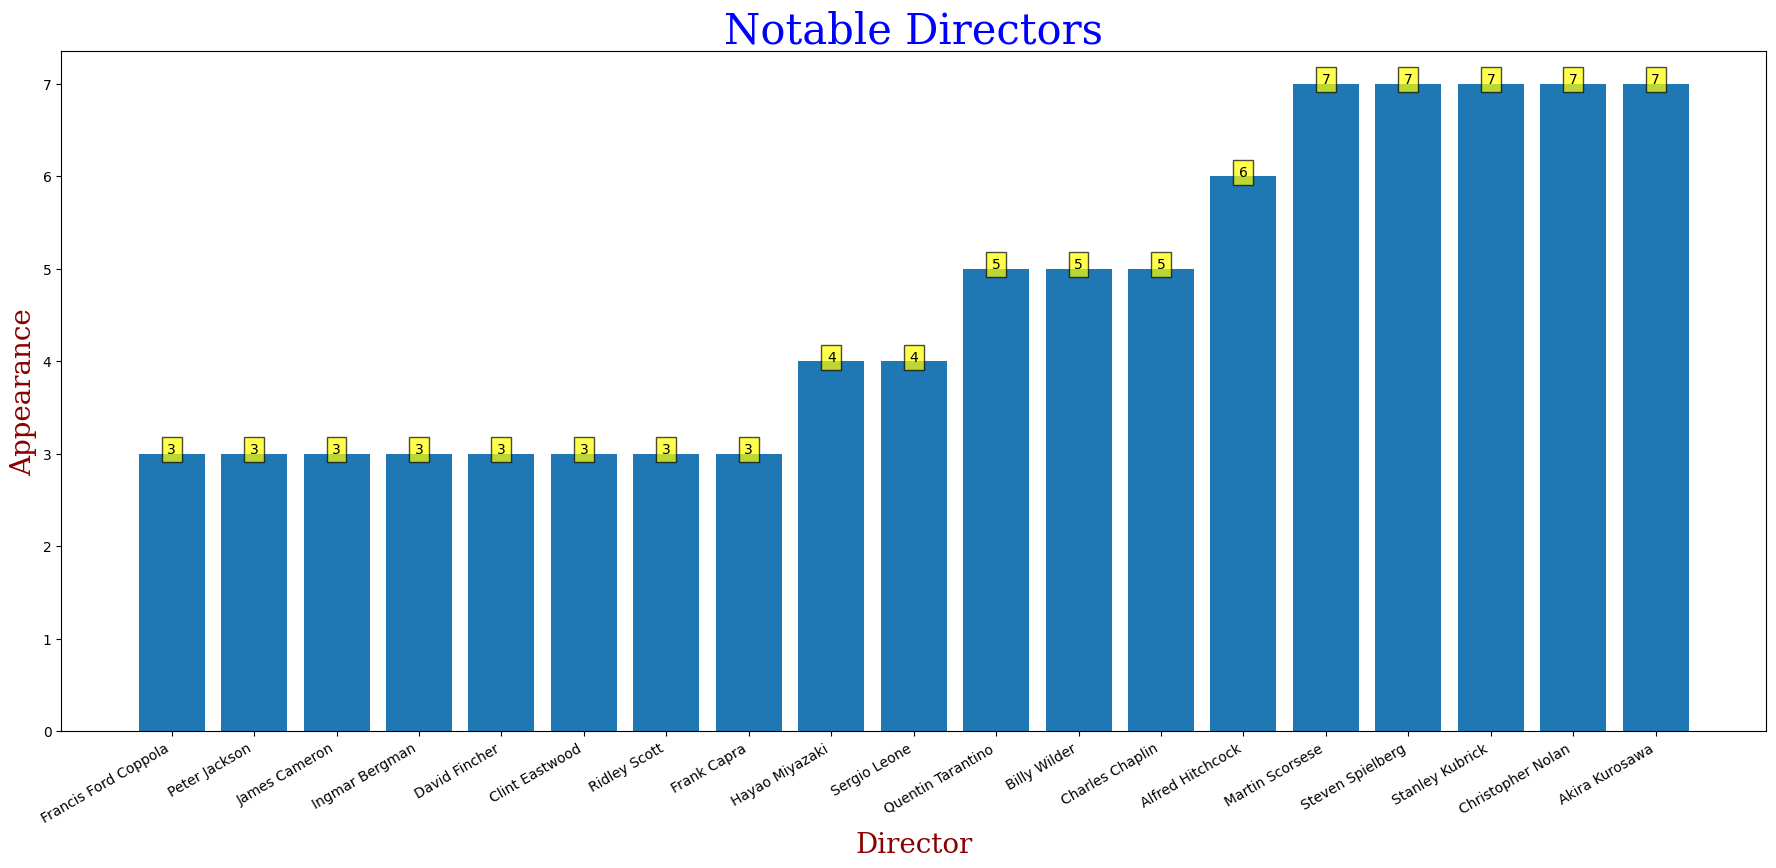

In [222]:
# creating the bar plot and figure size
fig, ax = plt.subplots(1, figsize = (22, 10))
fig.autofmt_xdate()
directors = popular_directors['Directors']
total = popular_directors['Count']

# calling the function to add value labels
addlabels(directors, total)

# using bar graph to display typical directors in the list
plt.bar(directors,total)
plt.xlabel("Director", fontdict=font2)
plt.ylabel("Appearance", fontdict=font2)
plt.title("Notable Directors", fontdict=font1)
plt.show()

In [223]:
# display the number of movies by certificate
movies_certificate = movies.groupby(['Certificate']).size().reset_index(name='Movies_count').sort_values(by='Movies_count',ascending=False).reset_index(drop=True)
movies_certificate

,Certificate,Movies_count
0,R,97
1,PG,37
2,PG-13,35
3,Not Rated,24
4,G,19
5,Passed,16
6,Approved,14
7,13+,1
8,18+,1
9,GP,1


In [224]:
total_movies = 250
# take 3 popular movies certificate nowadays: R-rated, PG, PG-13
top3_movies_cer = movies_certificate.nlargest(n=3, columns=['Movies_count'])
dictt = top3_movies_cer.sum().to_dict()
other_certificate = total_movies - dictt['Movies_count']
top3_movies_cer.loc[len(top3_movies_cer.index)] = ['Other', 81] 
display(top3_movies_cer)


,Certificate,Movies_count
0,R,97
1,PG,37
2,PG-13,35
3,Other,81


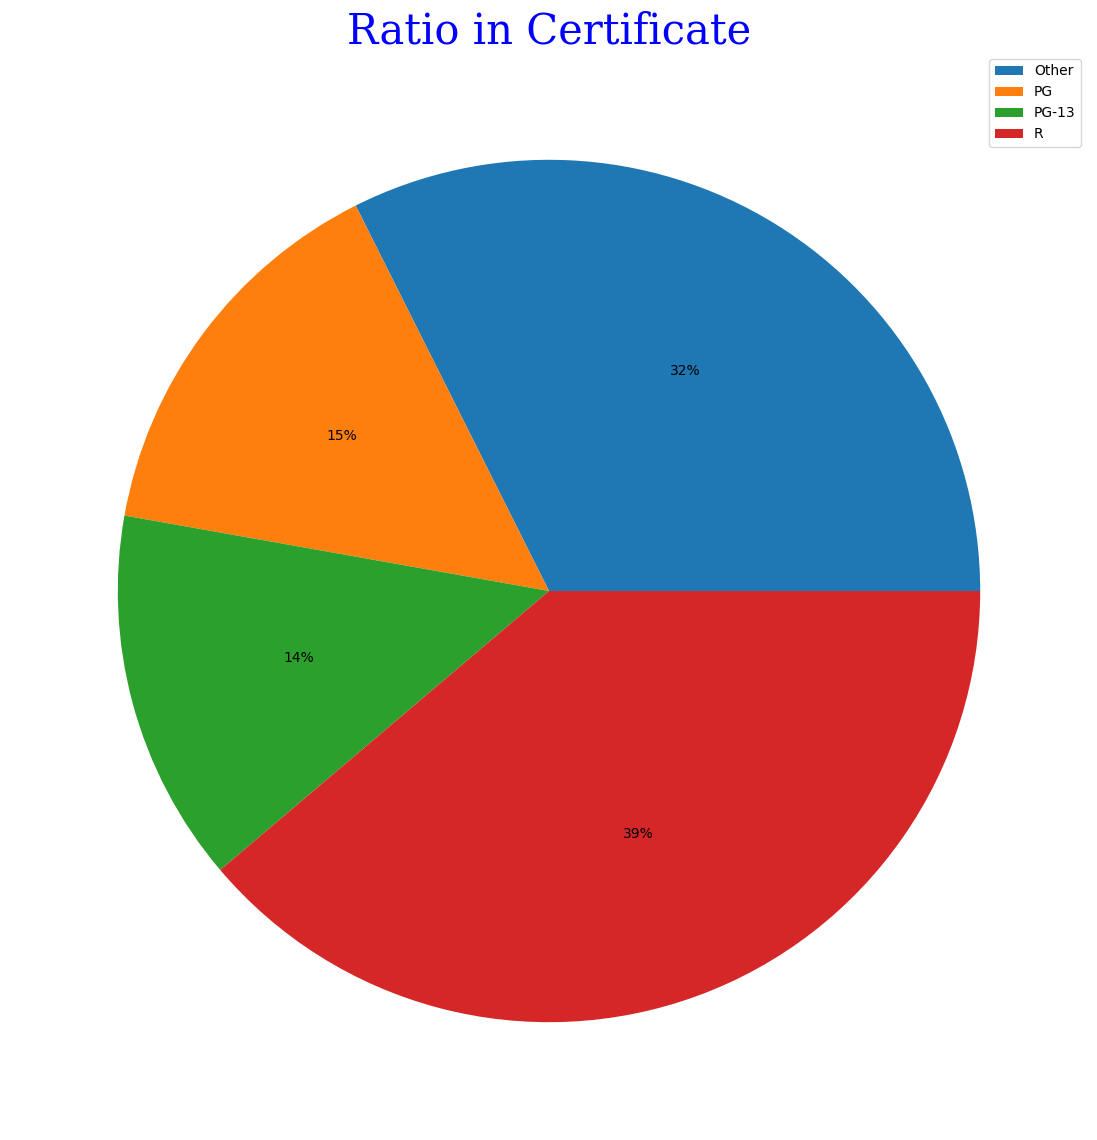

In [225]:
# get rate
rate = top3_movies_cer.groupby(['Certificate'])['Movies_count'].sum()

# figure size
fig = plt.figure(figsize=(20, 14))

# using pie chart to display popular certificate
plt.pie(rate, autopct='%1.0f%%', shadow=False)
plt.title("Ratio in Certificate", fontdict=font1)
plt.legend(labels=['Other', 'PG', 'PG-13', 'R'])
plt.show()


In [226]:
#Function to annotate bar plots. ax is the barplot axis object
def bar_annot(ax, annot_format='{:.2f}'):
    for p in ax.patches:
        annot = annot_format.format(p.get_height())
        ax.annotate(annot, (p.get_x()+3.5, p.get_height()+0.5))


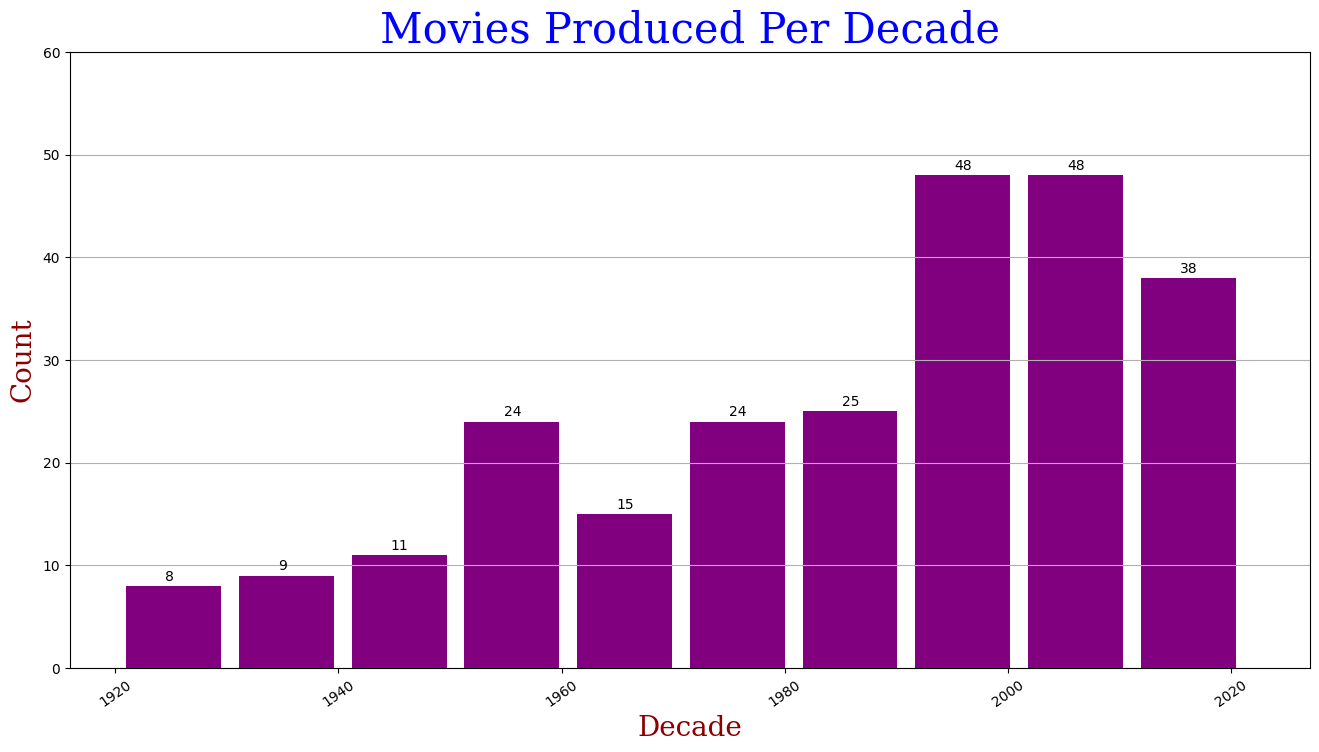

In [227]:
# figure size
fig = plt.figure(figsize=(16, 8))

# using bar graph to display number of movies produced per decade 
ax = movies['Year'].plot(kind='hist', color='purple', width=8.5, ylim=(0,60))
ax.set_title("Movies Produced Per Decade", fontdict=font1)
ax.yaxis.grid()
plt.ylabel('Count', fontdict=font2)
plt.xlabel('Decade', fontdict=font2)
plt.xticks(rotation=35)
bar_annot(ax,'{:.0f}')
plt.show()

In [6]:
grouped_df = movies.groupby('Year')['Rating'].mean().reset_index()

# Create a line plot of the mean rating over time using Plotly
fig = px.line(grouped_df, x='Year', y='Rating', title='Average IMDB Rating over Time', color_discrete_sequence=['blue'])

# Customize the plot
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating')

# Show the plot
fig.show()